# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the Data

In [2]:
lax_2019 = pd.read_csv('datasets/air-quality-reports/2019/los-angeles-county-aqi2019-date-cleaned.csv')
lax_2020 = pd.read_csv('datasets/air-quality-reports/2020/los-angeles-county-aqi2020-date-cleaned.csv')

In [3]:
traffic = pd.read_csv('datasets/traffic/la_data.csv')

In [4]:
traffic.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID
0,County,2019/01/01,6.0,CA,6037.0,Los Angeles County,2365053.0,7709577.0,27837706.0,8638986.0,6890475.0,3177404.0,3730800.0,3463369.0,1286744.0,408262.0,150096.0,43515.0,48055.0,06-06037-20190101
1,County,2019/01/02,6.0,CA,6037.0,Los Angeles County,1916798.0,8157832.0,34953192.0,10204647.0,8713256.0,4118795.0,5056970.0,4790407.0,1483851.0,377632.0,127165.0,41346.0,39123.0,06-06037-20190102
2,County,2019/01/03,6.0,CA,6037.0,Los Angeles County,1939199.0,8135431.0,35308770.0,10242324.0,8628446.0,4156116.0,5265467.0,4918977.0,1505304.0,384372.0,130608.0,39314.0,37842.0,06-06037-20190103
3,County,2019/01/04,6.0,CA,6037.0,Los Angeles County,1899517.0,8175113.0,35354896.0,9961960.0,8718755.0,4247070.0,5369022.0,4944403.0,1493297.0,400765.0,142891.0,40254.0,36479.0,06-06037-20190104
4,County,2019/01/05,6.0,CA,6037.0,Los Angeles County,1996844.0,8077786.0,35121500.0,10058558.0,8976550.0,4273998.0,5168011.0,4551821.0,1440573.0,428827.0,149329.0,39217.0,34616.0,06-06037-20190105


## Create weekly averages
Note: this was before we had the time series lesson so these methods aren't preferred, and are only used for this notebooks. Other notebooks use preferred methods

In [7]:
weekly_average_2019 = []
for i in range(0, 365, 7):
    weekly_average_2019.append(lax_2019.iloc[i:i+6]['Overall AQI Value'].mean())

In [9]:
weekly_average_2020= []
for i in range(0, 365, 7):
    weekly_average_2020.append(lax_2020.iloc[i:i+6]['Overall AQI Value'].mean())

In [10]:
aqi_diff = np.array(weekly_average_2019)-np.array(weekly_average_2020)

In [28]:
traffic.shape

(838, 20)

In [37]:
traffic.iloc[365:365+365]

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID
365,County,2020/01/01,6.0,CA,6037.0,Los Angeles County,2332593.0,7772925.0,28408015.0,8012799.0,7171381.0,3303835.0,4100719.0,3878261.0,1256125.0,446348.0,188247.0,34288.0,16012.0,06-06037-20200101
366,County,2020/01/02,6.0,CA,6037.0,Los Angeles County,1881876.0,8223642.0,35574513.0,10073670.0,8817641.0,4265798.0,5293548.0,5070346.0,1476935.0,366553.0,164673.0,32817.0,12532.0,06-06037-20200102
367,County,2020/01/03,6.0,CA,6037.0,Los Angeles County,1857894.0,8247624.0,36690443.0,10271645.0,9186799.0,4416158.0,5527622.0,5208659.0,1489918.0,374902.0,166074.0,34326.0,14340.0,06-06037-20200103
368,County,2020/01/04,6.0,CA,6037.0,Los Angeles County,2032359.0,8073159.0,35376724.0,9922738.0,9090019.0,4319713.0,5236876.0,4743737.0,1398184.0,435070.0,183741.0,31454.0,15192.0,06-06037-20200104
369,County,2020/01/05,6.0,CA,6037.0,Los Angeles County,2213909.0,7891609.0,31971612.0,8951498.0,8437927.0,3907506.0,4708320.0,4111100.0,1220541.0,386756.0,193807.0,37640.0,16517.0,06-06037-20200105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,County,2020/12/26,6.0,CA,6037.0,Los Angeles County,3475605.0,6629913.0,23016569.0,5651924.0,6243482.0,2757834.0,3369822.0,3204202.0,1099230.0,467467.0,165885.0,38075.0,18648.0,06-06037-20201226
726,County,2020/12/27,6.0,CA,6037.0,Los Angeles County,4077781.0,6027737.0,17581454.0,4147527.0,4562673.0,2136375.0,2517519.0,2488566.0,931398.0,424051.0,265677.0,78166.0,29502.0,06-06037-20201227
727,County,2020/12/28,6.0,CA,6037.0,Los Angeles County,4057897.0,6047621.0,17495514.0,3977593.0,4405684.0,2103002.0,2647709.0,2836958.0,979355.0,312317.0,149134.0,54479.0,29283.0,06-06037-20201228
728,County,2020/12/29,6.0,CA,6037.0,Los Angeles County,3851925.0,6253593.0,19954340.0,4703326.0,4941636.0,2401766.0,2981309.0,3187405.0,1128649.0,364745.0,162258.0,56544.0,26702.0,06-06037-20201229


In [33]:
weekly_traffic = []
for i in range(365, 365+365, 7):
    weekly_traffic.append(traffic.iloc[i:i+6]['Number of Trips'].mean())

In [17]:
max(weekly_traffic)

50807039.666666664

## Visualize the Data

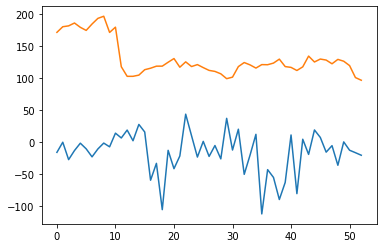

In [34]:
plt.plot(aqi_diff)
plt.plot(weekly_traffic/(max(weekly_traffic)-min(weekly_traffic))*100)

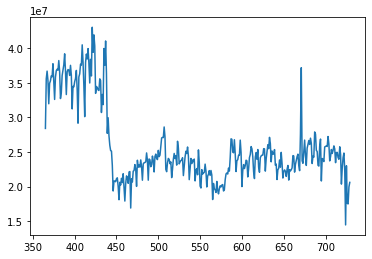

In [35]:
plt.plot(traffic['Number of Trips'].iloc[365:365*2])

Text(0.5, 1.0, 'Average weekly number of trips for Los Angeles County, 2020')

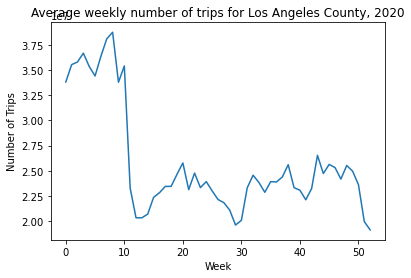

In [40]:
plt.plot(weekly_traffic)
plt.ylabel('Number of Trips')
plt.xlabel('Week')
plt.title('Average weekly number of trips for Los Angeles County, 2020')

In [42]:
population = []
for i in range(365, 365+365, 7):
    population.append(traffic.iloc[i:i+6]['Population Staying at Home'].mean())

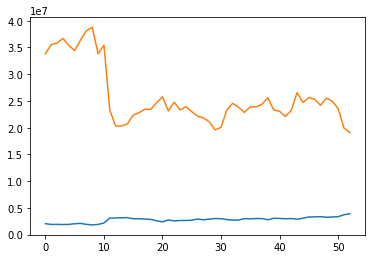

In [46]:
plt.plot(population)
plt.plot(weekly_traffic)